# Judy

## How does the  relationship between the frequency of music listening and mental health outcomes vary depending on the preferred music genre?

In [1]:
# Run this cell to ensure that altair plots show up without having
# the notebook be really large.
# We will talk more about what these lines do later in the course

import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## 1. Loading and inspecting the data

#### Reading Data
I will first start by reading the data.

In [2]:
mxmh = pd.read_csv('../../data/raw/mxmh_survey_results.csv')
mxmh

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


#### Inspecting the data

Let's inspect the first 5 columns as well.

In [3]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### Dataset Information

Let's also explore some information about the dataset such as its size, column names, data types, number of NaN values and a summary description of the dataframe's numerical columns (range, central tendency, spread).

#### Dataset Size

In [4]:
mxmh.shape

(736, 33)

We can see that the dataset has 736 rows and 33 columns.

#### Column names

In [5]:
mxmh.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

The 33 columns are 'Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'

#### Data types 

In [6]:
mxmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

There are 25 categorical attributes, 1 temporal attribute, and 7 quantitative attributes.

In [7]:
mxmh.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

We can see that there is 1 missing value for the attribute 'Age', 'Primary streaming service', and 'Composer'. There are also 3 missing values for 'While Working', 4 missing values for 'Instrumentalist' and 'Foreign Languages', 107 missing values for BPM and 8 missing values for 'Music effects'

#### Summary Statistics

In [8]:
mxmh.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


The summary description of the data frame's numerical columns is shown above. It displays the range, central tendency and spread of the quantitative attributes.

## 2. Cleaning the Data

At first glance, the attribute 'Permissions' does not seem to be very relevant to the analysis. Let's check how many unique values this attribute has.

In [9]:
mxmh['Permissions'].nunique()

1

In [10]:
mxmh['Permissions'].unique()

array(['I understand.'], dtype=object)

Since there is only one possible value for Permissions which is 'I understand', we can safely drop this column as it will not be relevant to the analysis.

In [11]:
mxmh.drop('Permissions', axis=1)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


Now, we end up with 32 columns.

#### Handling Missing Values

Next, since we don't want to have missing values in the dataset, we will perform some data cleaning. For the attributes with less than 10 missing values, we will just remove the rows with missing data since it will not be affecting the results too much as we have 736 observations so the difference is negligible. However, for the 'BPM' attribute that has 107 missing values, we will impute the missing values with the median value of BPM so that we don't lose data and to ensure that the results are not biased.

In [12]:
# Removing rows of attributes with <10 missing values 
for col in mxmh.columns:
    if (mxmh[col].isnull().sum() < 10):
        mxmh = mxmh.dropna(subset=[col])

In [13]:
# Impute missing values in BPM
mxmh.fillna(mxmh['BPM'].median(), inplace=True)

In [14]:
# Let's check for missing values
mxmh.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

After checking, we can see that there are no missing values anymore in our dataset.

## 3. Exploratory Data Analysis

Now, we can move on to the EDA part. The research question is "How does the relationship between the frequency of music listening and mental health outcomes vary depending on the preferred music genre?"

First, we can start looking at the individual distributions of frequency of music listening (hours per day) and the mental health outcomes (anxiety, depression, insomnia, and OCD).

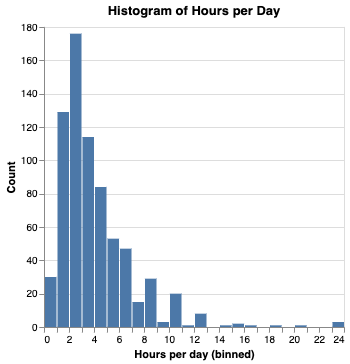

In [15]:
hours_distribution = alt.Chart(mxmh).mark_bar().encode(
                     alt.X('Hours per day:Q',  bin=alt.BinParams(maxbins=30), title='Hours per day (binned)'),
                    alt.Y('count():Q', title='Count')
                    ).properties(title='Histogram of Hours per Day')
hours_distribution

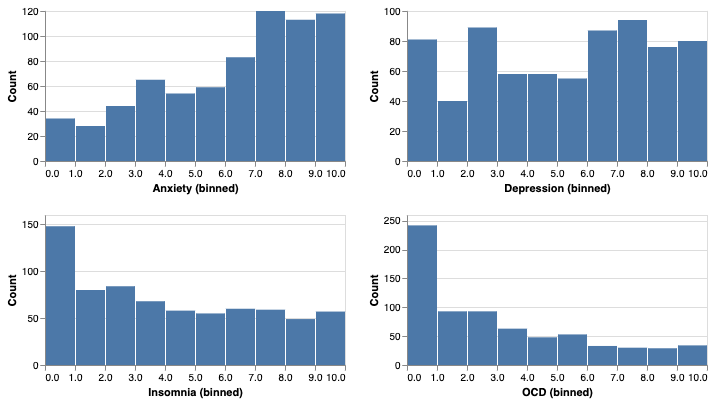

In [16]:
mho_distributions = alt.Chart(mxmh).mark_bar().encode(
                     alt.X(alt.repeat(), bin=alt.BinParams(maxbins=15), type = 'quantitative'),
                    alt.Y('count():Q', title='Count')
                    ).properties(height=150).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
mho_distributions

We can see the shape of the data for each of the mental health outcomes. It seems like none of them follow a Normal distribution. 
- Anxiety: The histogram shows that the data is somewhat left-skewed, indicating that many people experience higher levels of anxiety.
- Depression: The histogram shows two peaks (one from 0-3.0) and the other at (6.0-7.0).
- Insomnia: The histogram shows that the data is more right-skewed, indicating that more people experience lower levels of insomnia, with a peak at 0.
- OCD: The histogram shows that the data is more right-skewed, indicating that more people experience lower levels of OCD, with a peak at 0.

Now, let's take a look at the distribution of the preferred music genres with a bar chart.

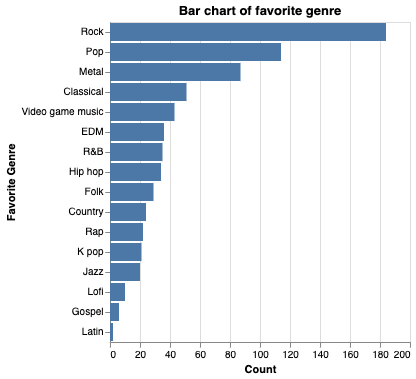

In [17]:
mho_genres = alt.Chart(mxmh).mark_bar().encode(
                     alt.X('count():Q', title='Count'),
                    alt.Y('Fav genre', title='Favorite Genre', sort='-x')
                    ).properties(title='Bar chart of favorite genre')
mho_genres

From the bar chart, we can notice that 'Rock' is the most popular genre, with more than 180 people rating it as their favorite genre. In contrast, 'Latin' is the least popular genre.

Let's explore the relationship between the favorite genres and the mental health outcomes.

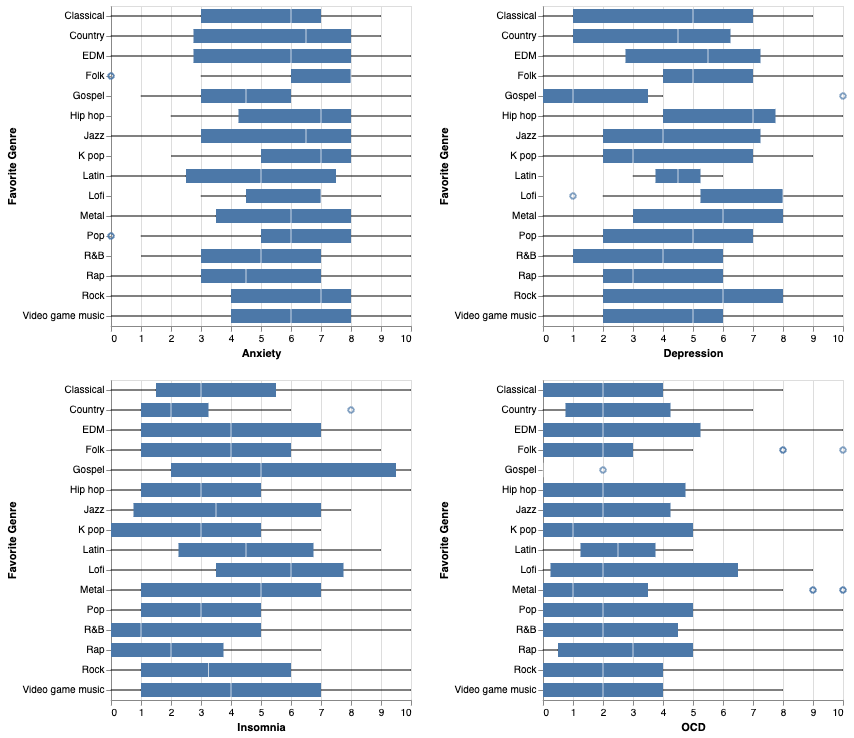

In [18]:
mho_genres_boxplot = alt.Chart(mxmh).mark_boxplot().encode(
                     alt.X(alt.repeat(), type='quantitative'),
                    alt.Y('Fav genre', title='Favorite Genre', sort='x')
                    ).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
mho_genres_boxplot

We can also explore the relationship between the frequency of music listening and the mental health outcomes.

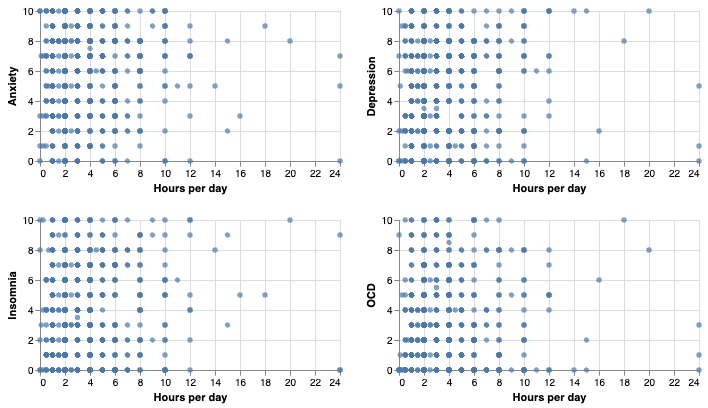

In [19]:
hours_mho = alt.Chart(mxmh).mark_circle().encode(
                     alt.X('Hours per day', title='Hours per day'),
                    alt.Y(alt.repeat(), type='quantitative')
                    ).properties(height=150).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
hours_mho

From the scatterplots, we can notice that there does not seem to be a correlation between hours per day individuals listened to music and the mental health score for each of anxiety, depression, insomnia or OCD. Hence, we are unable to find a general trend between listening hours and mental health scores.